# 1. Install and import Dependencies

In [1]:
!pip3 install torch torchvision torchaudio

  Using cached torch-1.12.0-cp38-none-macosx_10_9_x86_64.whl (137.6 MB)
  Using cached torchvision-0.13.0-cp38-cp38-macosx_10_9_x86_64.whl (1.3 MB)
  Using cached torchaudio-0.12.0-cp38-cp38-macosx_10_15_x86_64.whl (3.1 MB)
  Using cached typing_extensions-4.3.0-py3-none-any.whl (25 kB)
  Using cached numpy-1.23.1-cp38-cp38-macosx_10_9_x86_64.whl (18.1 MB)
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Using cached Pillow-9.2.0-cp38-cp38-macosx_10_10_x86_64.whl (3.1 MB)
  Using cached idna-3.3-py3-none-any.whl (61 kB)
  Using cached charset_normalizer-2.1.0-py3-none-any.whl (39 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 5.5 MB/s eta 0:00:00
  Using cached certifi-2022.6.15-py3-none-any.whl (160 kB)


In [2]:
!git clone https://github.com/ultralytics/yolov5  # clone

Cloning into 'yolov5'...
remote: Enumerating objects: 13225, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 13225 (delta 17), reused 29 (delta 15), pack-reused 13188
Receiving objects: 100% (13225/13225), 12.54 MiB | 7.77 MiB/s, done.
Resolving deltas: 100% (9071/9071), done.


In [4]:
!pip freeze > requirements.txt

In [5]:
!cd yolov5 & pip install -r requirements.txt  # install

In [7]:
!pip install matplotlib
!pip install opencv-python
!pip install pandas
!pip install pyyaml
!pip install tqdm
!pip install seaborn
!pip install tensorboard

  Using cached matplotlib-3.5.2-cp38-cp38-macosx_10_9_x86_64.whl (7.3 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.34.4-py3-none-any.whl (944 kB)
  Using cached kiwisolver-1.4.4-cp38-cp38-macosx_10_9_x86_64.whl (65 kB)
  Using cached opencv_python-4.6.0.66-cp36-abi3-macosx_10_15_x86_64.whl (46.4 MB)
  Using cached pandas-1.4.3-cp38-cp38-macosx_10_9_x86_64.whl (11.4 MB)
  Using cached pytz-2022.1-py2.py3-none-any.whl (503 kB)
  Using cached PyYAML-6.0-cp38-cp38-macosx_10_9_x86_64.whl (192 kB)
  Using cached tqdm-4.64.0-py2.py3-none-any.whl (78 kB)
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 6.5 MB/s eta 0:00:0000:0100:01
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Using cached tensorboard_data_server-0.6.1-py3-none-macosx_10_9_x86_64.whl (3.5 MB)
  Using cached google_auth-2.9.1-py2.py3-none-any.whl (167 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none

In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os
import tqdm

/Users/damiano/Object Detection/YOLOv5/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
!pip install matplotlib-inline

  Using cached matplotlib_inline-0.1.3-py3-none-any.whl (8.2 kB)


# 2. Load Model

In [9]:
model = torch.hub.load("ultralytics/yolov5","yolov5s")

Using cache found in /Users/damiano/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-7-18 Python-3.8.8 torch-1.12.0 CPU

100.0%

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [10]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

# 3.Make Detections

In [11]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [12]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 705.6ms pre-process, 308.2ms inference, 18.1ms NMS per image at shape (1, 3, 384, 640)


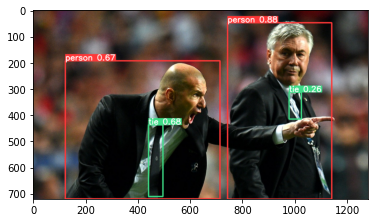

In [13]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

# 4. Train from Scratch

In [38]:
!cd yolov5 &&python train.py --img 640 --batch 16 --epochs 10 --data "/Users/damiano/Object Detection/YOLOv5/yolov5/data/dataset.yaml" --weights yolov5s.pt --workers 0

train: weights=yolov5s.pt, cfg=, data=/Users/damiano/Object Detection/YOLOv5/yolov5/data/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=0, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
fatal: cannot change to '/Users/damiano/Object': No such file or directory
YOLOv5 🚀 2022-7-30 Python-3.8.8 torch-1.12.0 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0

# 5. Detections from Custm Model

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/damiano/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-8-8 Python-3.8.8 torch-1.12.0 CPU

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients
Adding AutoShape... 


In [25]:
!python yolov5/detect.py --weights yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source yolov5/Raccolta_immagini_incendi

detect: weights=['yolov5/runs/train/exp/weights/best.pt'], source=yolov5/Raccolta_immagini_incendi, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
fatal: cannot change to '/Users/damiano/Object': No such file or directory
YOLOv5 🚀 2022-7-30 Python-3.8.8 torch-1.12.1 CPU

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients
image 1/89 /Users/damiano/Object Detection/YOLOv5/yolov5/Raccolta_immagini_incendi/042342652--4daa4788-4ac4-48b4-b243-4651e509e551.jpg: 448x640 1 fire, Done. (0.390s)
image 2/89 /Users/damiano/Object Detection/YOLOv5/yolov5/Raccolta_immagini_incendi/121900668-d661adc0-d98d-4d4d-a858-47a4c71d871a.jpg: 3

image 54/89 /Users/damiano/Object Detection/YOLOv5/yolov5/Raccolta_immagini_incendi/images24.jpg: 448x640 2 fires, Done. (0.537s)
image 55/89 /Users/damiano/Object Detection/YOLOv5/yolov5/Raccolta_immagini_incendi/images242.jpg: 480x640 2 fires, Done. (0.546s)
image 56/89 /Users/damiano/Object Detection/YOLOv5/yolov5/Raccolta_immagini_incendi/images30.jpg: 352x640 2 fires, Done. (0.377s)
image 57/89 /Users/damiano/Object Detection/YOLOv5/yolov5/Raccolta_immagini_incendi/images34.jpg: 384x640 1 fire, Done. (0.408s)
image 58/89 /Users/damiano/Object Detection/YOLOv5/yolov5/Raccolta_immagini_incendi/images35.jpg: 416x640 1 fire, Done. (0.462s)
image 59/89 /Users/damiano/Object Detection/YOLOv5/yolov5/Raccolta_immagini_incendi/images38.jpg: 448x640 2 fires, Done. (0.475s)
image 60/89 /Users/damiano/Object Detection/YOLOv5/yolov5/Raccolta_immagini_incendi/images40.jpg: 480x640 1 fire, Done. (0.496s)
image 61/89 /Users/damiano/Object Detection/YOLOv5/yolov5/Raccolta_immagini_incendi/images41

In [8]:
img = os.path.join('yolov5','data','fire_detection_yolov5','val','img (3).jpg')
results = model(img)
results.print()

image 1/1: 183x275 1 fire
Speed: 12.9ms pre-process, 335.9ms inference, 1.5ms NMS per image at shape (1, 3, 448, 640)


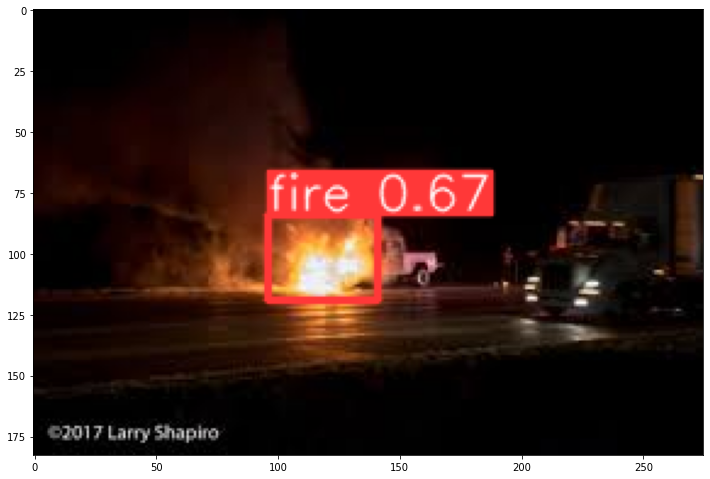

In [9]:
%matplotlib inline
plt.figure(figsize=(12,16))
plt.imshow(np.squeeze(results.render()))
plt.show()

In [66]:
img1 = os.path.join('yolov5','Raccolta immagini incendi','Vasto incendio a Roma Nord Ovest27 giugno 2022.jpg')
results = model(img1)
results.print()

image 1/1: 360x640 2 fires
Speed: 65.9ms pre-process, 364.5ms inference, 2.7ms NMS per image at shape (1, 3, 384, 640)


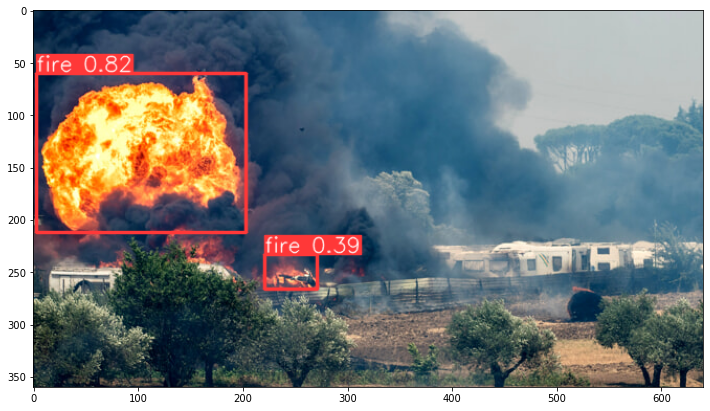

In [67]:
%matplotlib inline
plt.figure(figsize=(12,16))
plt.imshow(np.squeeze(results.render()))
plt.show()

In [68]:
img2 = os.path.join('yolov5','Raccolta immagini incendi','23-fb-img-1634379013352.jpeg')
results = model(img2)
results.print()

image 1/1: 380x284 1 fire
Speed: 49.2ms pre-process, 477.4ms inference, 1.4ms NMS per image at shape (1, 3, 640, 480)


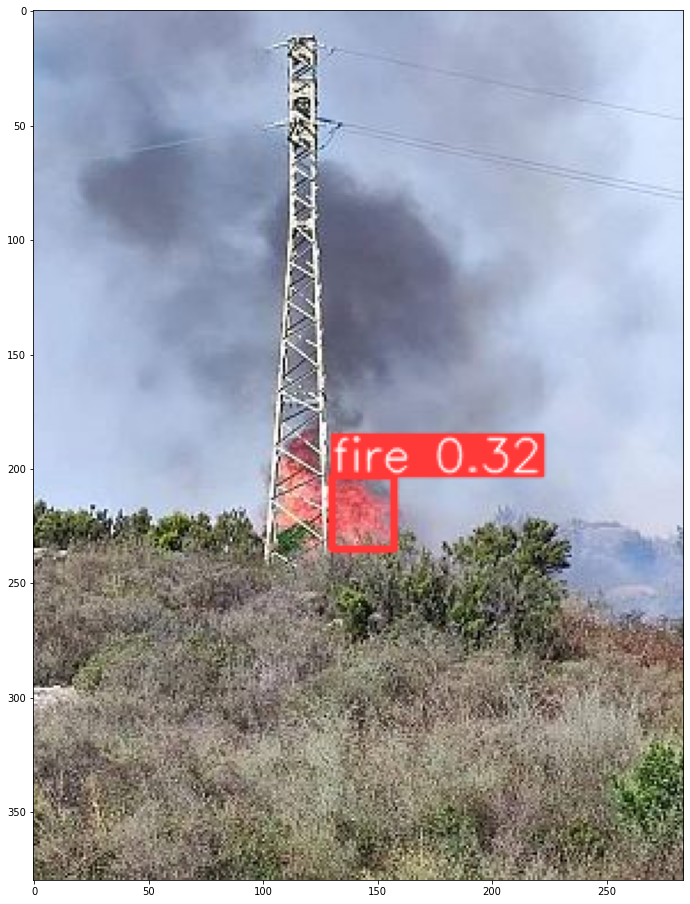

In [69]:
%matplotlib inline
plt.figure(figsize=(12,16))
plt.imshow(np.squeeze(results.render()))
plt.show()

In [70]:
img3 = os.path.join('yolov5','Raccolta immagini incendi','841587-thumb-full-720-270622_incendio_aurelia.jpeg')
results = model(img3)
results.print()

image 1/1: 720x1280 3 fires
Speed: 49.4ms pre-process, 363.5ms inference, 1.1ms NMS per image at shape (1, 3, 384, 640)


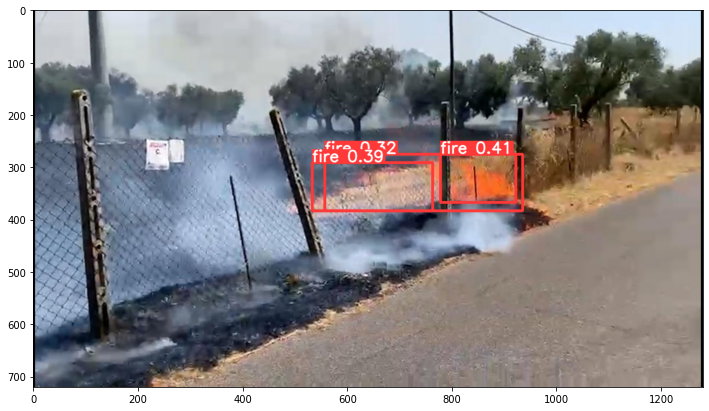

In [71]:
%matplotlib inline
plt.figure(figsize=(12,16))
plt.imshow(np.squeeze(results.render()))
plt.show()

In [72]:
img4 = os.path.join('yolov5','Raccolta immagini incendi','hero incendi italia calabria.jpeg')
results = model(img4)
results.print()

image 1/1: 1302x2080 3 fires
Speed: 170.4ms pre-process, 412.0ms inference, 1.3ms NMS per image at shape (1, 3, 416, 640)


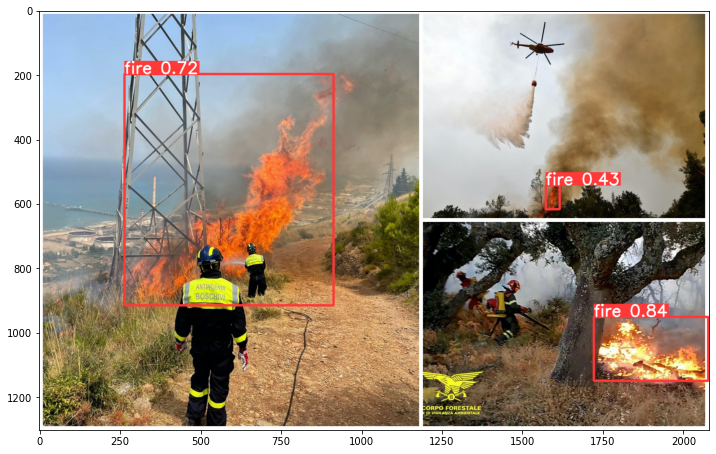

In [73]:
%matplotlib inline
plt.figure(figsize=(12,16))
plt.imshow(np.squeeze(results.render()))
plt.show()

In [78]:
img6 = os.path.join('yolov5','Raccolta immagini incendi','Vasto incendio in via di Monachina nel quartiere AurelioCREDITO_Francesco Fotia _ AGF.jpeg')
results = model(img6)
results.print()

image 1/1: 360x640 5 fires
Speed: 53.8ms pre-process, 758.4ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)


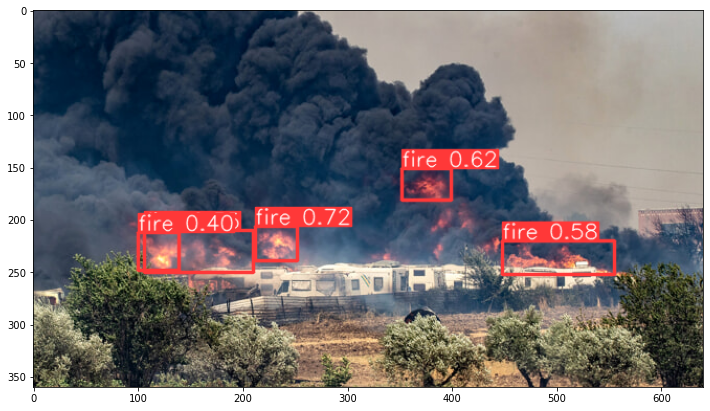

In [79]:
%matplotlib inline
plt.figure(figsize=(12,16))
plt.imshow(np.squeeze(results.render()))
plt.show()

# Video detection

In [17]:
cap = cv2.VideoCapture("/Users/damiano/Desktop/IA/Datasets/2022-07-18_Croazia_incendio.mp4")
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Real-Time Detections

In [38]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Tensorboard

In [1]:
%load_ext tensorboard
%tensorboard --logdir=.